In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from tensorflow.keras import datasets

In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

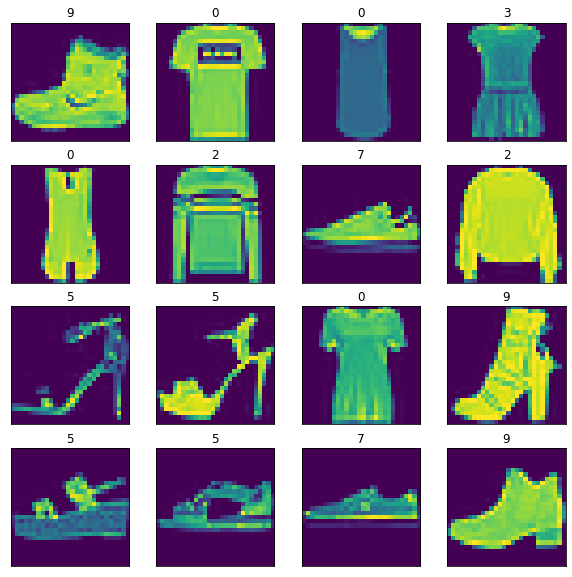

In [ ]:
plt.figure(figsize=(10,10))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(x_train[i])
  plt.xticks([])
  plt.yticks([])
  plt.title(y_train[i])

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [ ]:
mod=Sequential()
mod.add(Conv2D(128,(3,3),strides=(2,2),activation='relu',input_shape=(28,28,1)))
mod.add(MaxPooling2D(pool_size=(2,2)))
mod.add(Conv2D(256,(3,3),strides=(2,2),activation='relu',input_shape=(28,28,1)))
mod.add(MaxPooling2D(pool_size=(2,2)))
mod.add(Flatten())
mod.add(Dense(128,activation='relu'))
mod.add(Dense(10,activation='softmax'))

In [ ]:
mod.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
h1=mod.fit(x_train,y_train,epochs=15,validation_data=(x_test,y_test))

Epoch 1/15
1875/1875 [==============================] - 67s 35ms/step - loss: 0.5436 - accuracy: 0.8031 - val_loss: 0.4233 - val_accuracy: 0.8497
Epoch 2/15
1875/1875 [==============================] - 65s 35ms/step - loss: 0.3745 - accuracy: 0.8623 - val_loss: 0.3684 - val_accuracy: 0.8659
Epoch 3/15
1875/1875 [==============================] - 64s 34ms/step - loss: 0.3322 - accuracy: 0.8776 - val_loss: 0.3867 - val_accuracy: 0.8611
Epoch 4/15
1875/1875 [==============================] - 64s 34ms/step - loss: 0.3072 - accuracy: 0.8871 - val_loss: 0.3497 - val_accuracy: 0.8767
Epoch 5/15
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2936 - accuracy: 0.8926 - val_loss: 0.3690 - val_accuracy: 0.8736
Epoch 6/15
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2865 - accuracy: 0.8953 - val_loss: 0.4030 - val_accuracy: 0.8668
Epoch 7/15
1875/1875 [==============================] - 63s 34ms/step - loss: 0.2821 - accuracy: 0.8974 - val_loss: 0.3879 -

In [ ]:
res=pd.DataFrame(h1.history)
res['Epochs']=h1.epoch
res.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
10,0.282960,0.898650,0.428419,0.8691,10
11,0.285688,0.897717,0.443110,0.8769,11
12,0.287925,0.897533,0.438939,0.8645,12
13,0.292408,0.896300,0.419071,0.8679,13
14,0.296360,0.895567,0.596124,0.8597,14


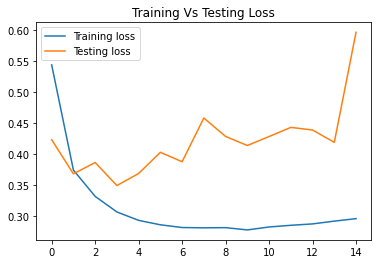

In [ ]:
plt.plot(res['Epochs'],res['loss'],label='Training loss')
plt.plot(res['Epochs'],res['val_loss'],label='Testing loss')
plt.title('Training Vs Testing Loss')
plt.legend()
plt.show()

In [ ]:
y_pred=mod.predict(x_test)

In [ ]:
y_pred=y_pred.argmax(axis=1)
y_pred[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
y_test1=y_test.argmax(axis=1)
y_test1[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_pred,y_test1))
print(classification_report(y_pred,y_test1))

[[739   1   8  11   0   0  74   0   1   1]
 [  1 960   1   4   0   0   1   0   1   0]
 [ 15   1 752  19  46   0  44   0   2   0]
 [ 23  27  18 899  47   2  33   0   4   0]
 [  1   1  59  13 711   0  50   0   2   0]
 [  2   0   0   0   0 946   0  21   4   7]
 [207   8 158  50 187   0 781   0  11   1]
 [  0   0   0   0   0  19   0 867   2  17]
 [ 12   2   4   2   9   2  16   0 969   1]
 [  0   0   0   2   0  31   1 112   4 973]]
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       835
           1       0.96      0.99      0.98       968
           2       0.75      0.86      0.80       879
           3       0.90      0.85      0.88      1053
           4       0.71      0.85      0.77       837
           5       0.95      0.97      0.96       980
           6       0.78      0.56      0.65      1403
           7       0.87      0.96      0.91       905
           8       0.97      0.95      0.96      1017
           9       0.97     